# Problem:

Historically, academic and research materials, such as textbooks, manuscripts, and other significant documents, have existed primarily in a physical format. This presents numerous challenges. Firstly, the accessibility of these resources is limited to those who can physically access them - those within the proximity of the library or archive where they're stored. Secondly, these valuable materials are prone to deterioration over time due to environmental factors, mishandling, and normal wear and tear. Lastly, these resources, when not digitized, are not searchable, making it harder to extract specific information.


# Solution:

The implementation of Optical Character Recognition (OCR) technology presents a practical solution. Digitizing these resources means that they can be accessed remotely from any part of the world, therefore extending their utility to a global audience. Digitization also mitigates the issue of physical deterioration, preserving these resources indefinitely. Furthermore, once digitized, these documents become searchable, facilitating easier data extraction and research.

# Methodology: 

The provided code employs the Optical Character Recognition (OCR) technique to extract text from images. The OCR process has been made possible through the use of two important Python libraries: OpenCV and PyTesseract.


OpenCV (Open Source Computer Vision Library) is a powerful open-source computer vision and machine learning software library. It provides a diverse set of capabilities for image processing, including loading images, converting color spaces, and thresholding.


PyTesseract is a Python wrapper for Google's Tesseract-OCR Engine which recognizes text from images.


**CODE SUMMARY**


The Python script performs the following steps:

1. Load the Image: The cv2.imread() function from OpenCV is used to load the image from the specified path.

2. Verify Image Load: The code checks if the image is loaded successfully. If not, it prints an error message.

3. Convert to Grayscale: The loaded image is then converted to grayscale using cv2.cvtColor(). This is done because color information is not typically useful in text recognition, and grayscale simplifies the image while retaining essential information.

4. Thresholding: The grayscale image is further preprocessed by applying a binary threshold using cv2.threshold(). This helps in segregating the text (foreground) from the background.

5. OCR with Tesseract: PyTesseract's image_to_string() function is used to extract text from the processed image.

6. Display the Image: The original image is displayed using Matplotlib's imshow() function.

7. Return Extracted Text: The function extract_text() returns the extracted text which is then printed.

8. Loop Over Images: The script is designed to process multiple images. It loops over a list of image filenames, applies the extract_text() function to each one, and prints the extracted text. The images are located in the specified image directory.







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import cv2
import pytesseract
from PIL import Image
import os
import matplotlib.pyplot as plt

In [14]:
!apt install tesseract-ocr -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,327 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 122545 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3

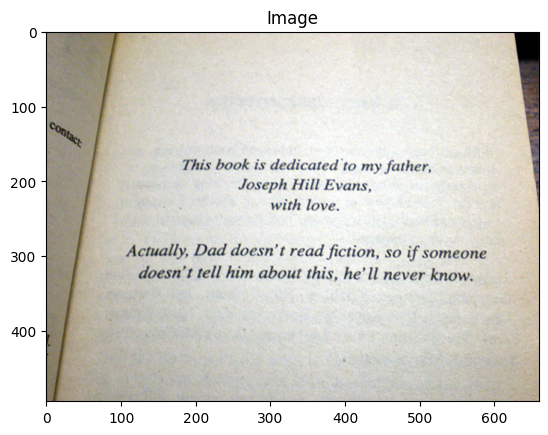

Extracted Text from b0: 
     
   

This book is dedicated to my father,
Joseph Hill Evans,
with love,

Actually, Dad doesn't read fiction, so if someone
doesn’t tell him about this, he’ ll never know.

 



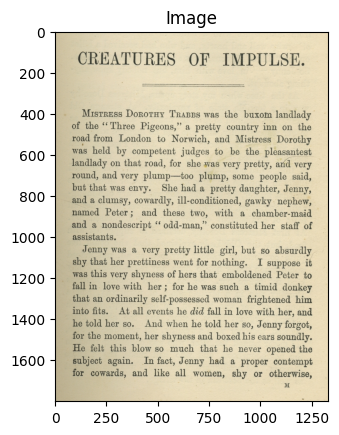

Extracted Text from b1: 
 CREATURES OF IMPULSE.

Mistress Dorotay Trapgs was the buxom landlady
of the ‘‘Three Pigeons,” a pretty country inn on the
road from London to Norwich, and Mistress Dorothy
was held by competent judges to be the pleasantest
landlady on that road, for she was very pretty, arid very
round, and very plump—too plump, some people said,
but that was envy. She hada pretty daughter, Jenny,
and a clumsy, cowardly, ill-conditioned, gawky nephew,
named Peter; and these two, with a chamber-maid
and a nondescript “‘ odd-man,” constituted her staff of
assistants.

Jenny was a very pretty little girl, but so absurdly
shy that her prettiness went for nothing. I suppose it
was this very shyness of hers that emboldened Peter to
fall in love with her; for he was such a timid donkey
that an ordinarily self-possessed woman frightened him
into fits. At all events he did fall in love with her, and
he told her so. And when he told her so, Jenny forgot,
for the moment, her shyness and

In [18]:
def extract_text(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Check if the image was properly loaded
    if img is None:
        print(f"Could not open or find the image: {image_path}")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to preprocess the image
    gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # Perform OCR using Tesseract
    text = pytesseract.image_to_string(Image.fromarray(gray))

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Image")
    plt.show()

    return text

image_files = ['b0', 'b1']
image_directory = '/content/drive/My Drive/Colab Notebooks/Computer Vision/'

for file in image_files:
    image_path = os.path.join(image_directory, f'{file}.jpg')
    extracted_text = extract_text(image_path)
    print(f"Extracted Text from {file}: \n", extracted_text)

# Findings of the Study:

The study found that OCR, specifically using OpenCV and Tesseract, could effectively extract text from scanned images of the resources. Even though the accuracy of extraction varied (dependent on the quality of images and the typefaces used in the original resources), a majority of the text was extracted accurately. The extracted text could then be stored in a digital format, thereby accomplishing the goal of digitization.

# Conclusion and Recommendations:

The study concludes that OCR technology is a powerful tool for digitizing academic resources, greatly enhancing their accessibility and longevity. For future work, it's recommended to invest in high-quality scanning hardware to improve image clarity and therefore improve OCR accuracy. The integration of machine learning algorithms could also prove beneficial to enhance the OCR capability with more complex layouts and typefaces. Finally, the addition of a post-processing step, such as spell-checking or grammar correction, could further improve the quality of the digitized text.

# Reference

OpenCV Python Tutorials: https://docs.opencv.org/master/d6/d00/tutorial_py_root.html

GitHub Repository: https://github.com/madmaze/pytesseract

GitHub Repository: https://github.com/tesseract-ocr/tesseract

In [ ]:
#Thanks, Prof